In [169]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn import *
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [170]:
df = pd.read_csv('Framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


Dropping the education column since it is not relavant for predicting heart disease.

In [171]:
df = df.drop('education', axis=1)

In [172]:
print(df.isnull().sum())

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


Data does not contain N/A values

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000
mean,0.440062,49.531043,0.489262,9.026162,0.028504,0.003905,0.303788,0.023819,237.224522,132.180203,82.819992,25.785650,75.408434,81.696993,0.152675
std,0.496491,8.556928,0.499982,11.912363,0.166442,0.062378,0.459982,0.152514,44.606911,22.122445,11.908809,4.076625,11.854502,22.674504,0.359744
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,51.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,207.000000,116.500000,74.000000,23.090000,67.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.330000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.500000,89.500000,28.060000,82.000000,87.000000,0.000000
max,1.000000,68.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,140.000000,394.000000,1.000000


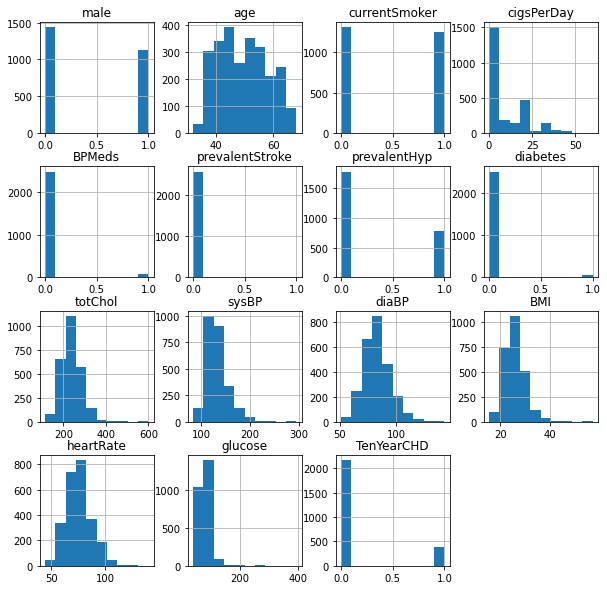

In [173]:
df.hist(figsize=(10,10))
df.describe()

An important thing to note is that only 15% of the TenYearCHD, which is our target variable, is true meaning our dataset is unbalanced

In [174]:
print('correlation table')
df.corr()

correlation table


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.033972,0.216530,0.345061,-0.043132,0.020173,-0.000630,0.021440,-0.058911,-0.052283,0.053637,0.080424,-0.106410,0.016603,0.091714
age,-0.033972,1.000000,-0.206656,-0.182459,0.106756,0.040755,0.303570,0.113623,0.273014,0.390575,0.208133,0.138598,0.005817,0.126497,0.223130
currentSmoker,0.216530,-0.206656,1.000000,0.774316,-0.050302,-0.023705,-0.113198,-0.050432,-0.059626,-0.137408,-0.121596,-0.159863,0.045556,-0.059724,0.025406
cigsPerDay,0.345061,-0.182459,0.774316,1.000000,-0.038203,-0.021165,-0.070316,-0.044419,-0.031113,-0.092324,-0.053760,-0.073886,0.053818,-0.061060,0.067797
BPMeds,-0.043132,0.106756,-0.050302,-0.038203,1.000000,0.026900,0.259312,0.050184,0.078216,0.243137,0.185475,0.091201,-0.000557,0.044209,0.057767
prevalentStroke,0.020173,0.040755,-0.023705,-0.021165,0.026900,1.000000,0.040327,0.031280,0.022006,0.044357,0.051691,0.009990,0.000484,0.040331,0.043053
prevalentHyp,-0.000630,0.303570,-0.113198,-0.070316,0.259312,0.040327,1.000000,0.063861,0.152651,0.694263,0.620187,0.295478,0.134694,0.072573,0.170482
diabetes,0.021440,0.113623,-0.050432,-0.044419,0.050184,0.031280,0.063861,1.000000,0.061857,0.095631,0.044300,0.082741,0.049927,0.597370,0.111684
totChol,-0.058911,0.273014,-0.059626,-0.031113,0.078216,0.022006,0.152651,0.061857,1.000000,0.202400,0.146012,0.109907,0.095330,0.055905,0.085642
sysBP,-0.052283,0.390575,-0.137408,-0.092324,0.243137,0.044357,0.694263,0.095631,0.202400,1.000000,0.783177,0.332108,0.177955,0.123740,0.217392


Checking for multicollinearity

In [175]:
def vif(df):
    vif_info = pd.DataFrame()
    # Not including last column since we are checking for multicollinearity in predictor features
    vif_info['VIF'] = [variance_inflation_factor(df.iloc[:, :-1].values, i) for i in range(len(df.iloc[:, :-1].columns))]
    vif_info['Column'] = df.iloc[:, :-1].columns
    return vif_info.sort_values('VIF', ascending=False)

print(vif(df), '\n')

corr = df.iloc[:, :-1].corr().replace(1.0, 0)
print(corr.abs().unstack().sort_values(ascending=False)[::2].head(10))



           VIF           Column
9   133.896952            sysBP
10  132.936327            diaBP
11   46.052827              BMI
1    41.012228              age
12   38.990254        heartRate
8    30.916770          totChol
13   20.682025          glucose
2     4.954936    currentSmoker
3     4.325267       cigsPerDay
6     2.345056     prevalentHyp
0     2.169288             male
7     1.528499         diabetes
4     1.119701           BPMeds
5     1.009506  prevalentStroke 

sysBP         diaBP            0.783177
cigsPerDay    currentSmoker    0.774316
sysBP         prevalentHyp     0.694263
prevalentHyp  diaBP            0.620187
diabetes      glucose          0.597370
BMI           diaBP            0.395350
sysBP         age              0.390575
male          cigsPerDay       0.345061
sysBP         BMI              0.332108
age           prevalentHyp     0.303570
dtype: float64


VIF is very high in many variables. Dropping VIF variables will improve ML models. Will also take avg of sysBP and diaBP since they are highly correlated and the avg can still tell if patient has high blood pressure. Also will be dropping CurrentSmoker since cigsPerDay also tells if someone smokes.

In [176]:
df['BPavg'] = (df['sysBP'] + df['diaBP'])/2
#df = df.drop(['diaBP', 'sysBP', 'currentSmoker', 'prevalentStroke', 'BPMeds', 'diabetes'], axis=1)
# move target column to end of dataframe
df = df[['male', 'age', 'cigsPerDay', 'prevalentHyp', 'totChol', 'BMI', 'heartRate', 'glucose', 'BPavg', 'TenYearCHD']]


print(vif(df))


         VIF        Column
8  81.934118         BPavg
5  43.776948           BMI
1  39.354379           age
6  37.735588     heartRate
4  30.821133       totChol
7  14.094475       glucose
3   2.168901  prevalentHyp
0   2.100761          male
2   1.870368    cigsPerDay


MinMax normalizing the data on a 0-1 scale will also reduce VIF

In [177]:
scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

print(vif(df))

         VIF        Column
8  14.099608         BPavg
4   8.375968       totChol
5   7.885944           BMI
6   7.259608     heartRate
1   6.218439           age
7   4.272616       glucose
3   2.563271  prevalentHyp
0   2.062213          male
2   1.849853    cigsPerDay


VIF is still above 5 for a few features, but they are important indicators of heart disease and must remain.

Create train/test split

In [178]:
# move target column to end of dataframe
#df = df['male', 'age', 'cigsPerDay', 'prevalentHyp', 'totChol', 'BMI', 'heartRate', 'glucose', 'BPavg', 'TenYearCHD']


X = df.iloc[:, :-1]
y = df.iloc[:, -1].astype(int)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)


In [179]:
#decomposition.PCA(n_components=5)

Linear Regression 

Logistic Regression with l1 (Lasso) penalty to reduce influence on non-important features.

In [180]:
log_reg = linear_model.LogisticRegression(C=1.0, penalty='l1', solver='liblinear',
                                         random_state=0).fit(X_train, y_train)
log_pred = log_reg.predict(X_test)

print(f'Accuracy: {round(metrics.accuracy_score(y_test, log_pred), 2)*100}%')

matrix = metrics.confusion_matrix(y_test, log_pred)
tn, fp, fn, tp = matrix.ravel()

print('\nTrue positive: ', tp)
print('False positive: ', fp)
print('True negative: ', tn)
print('False negative: ', fn)

print(f'\nRecall (TPR): {round((tp/(tp+fn))*100, 2)}%')


Accuracy: 83.0%

True positive:  6
False positive:  1
True negative:  420
False negative:  86

Recall (TPR): 6.52%



At first glance accuracy at 82% seems good, but after looking at the confusion a matrix values and the TPR it becomes clear that the model predicted almost every value to be negative. This is due to the dataset being unbalanced. Adding weights based on the frequency of classes in the training data can solve this.

In [181]:
log_reg = linear_model.LogisticRegression(C=1, penalty='l1', solver='liblinear', class_weight='balanced',
                                         random_state=0).fit(X_train, y_train)
log_pred = log_reg.predict(X_test)

print(f'Accuracy: {round(metrics.accuracy_score(y_test, log_pred), 2)*100}%')

matrix = metrics.confusion_matrix(y_test, log_pred)
tn, fp, fn, tp = matrix.ravel()

print('True positive: ', tp)
print('False positive: ', fp)
print('True negative: ', tn)
print('False negative: ', fn)

print(f'\nRecall (TPR): {round((tp/(tp+fn))*100, 2)}%')


Accuracy: 65.0%
True positive:  72
False positive:  161
True negative:  260
False negative:  20

Recall (TPR): 78.26%


The accuracy went down after adding weights, but the recall went up. Since a false negative is a lot worse than a false positive in this case, then increasing the recall is more important. Increasing the weight of a true value even more can improve recall.

In [182]:
log_reg = linear_model.LogisticRegression(C=1, penalty='l1', solver='liblinear', class_weight={0:1, 1:8},
                                         random_state=0).fit(X_train, y_train)
log_pred = log_reg.predict(X_test)

print(f'Accuracy: {round(metrics.accuracy_score(y_test, log_pred)*100, 2)}%')

matrix = metrics.confusion_matrix(y_test, log_pred)
tn, fp, fn, tp = matrix.ravel()

print('True positive: ', tp)
print('False positive: ', fp)
print('True negative: ', tn)
print('False negative: ', fn)

print(f'\nRecall (TPR): {round((tp/(tp+fn))*100, 2)}%')



Accuracy: 55.75%
True positive:  83
False positive:  218
True negative:  203
False negative:  9

Recall (TPR): 90.22%


Binarization approach. By getting the prediction probabilities for each class and changing the probability threshold for a true prediction from 0.5 to 0.4 can allow for less false negatives.

In [183]:
log_reg = linear_model.LogisticRegression(C=1, penalty='l1', solver='liblinear', class_weight='balanced',
                                         random_state=0).fit(X_train, y_train)

log_pred = preprocessing.binarize(log_reg.predict_proba(X_test)[:,1].reshape(-1, 1), threshold=0.40)


print(f'Accuracy: {round(metrics.accuracy_score(y_test, log_pred)*100, 2)}%')

matrix = metrics.confusion_matrix(y_test, log_pred)
tn, fp, fn, tp = matrix.ravel()

print('True positive: ', tp)
print('False positive: ', fp)
print('True negative: ', tn)
print('False negative: ', fn)

print(f'\nRecall (TPR): {round((tp/(tp+fn))*100, 2)}%')

Accuracy: 54.39%
True positive:  87
False positive:  229
True negative:  192
False negative:  5

Recall (TPR): 94.57%


Decision Tree with class weights

In [184]:
dt = tree.DecisionTreeClassifier(class_weight={0:1, 1:8}, 
                                 random_state=0).fit(X_train, y_train)
dt_pred = dt.predict(X_test)


print(f'Accuracy: {round(metrics.accuracy_score(y_test, dt_pred)*100, 2)}%')

matrix = metrics.confusion_matrix(y_test, dt_pred)
tn, fp, fn, tp = matrix.ravel()

print('True positive: ', tp)
print('False positive: ', fp)
print('True negative: ', tn)
print('False negative: ', fn)

print(f'\nRecall (TPR): {round((tp/(tp+fn))*100, 2)}%')

Accuracy: 75.05%
True positive:  33
False positive:  69
True negative:  352
False negative:  59

Recall (TPR): 35.87%


Even with giving true a much higher weight than false there is still a poor recall

Ada Boost Classifier. The estimator used is a low depth decision tree and a certain amount of features considered at each split to prevent over-fitting.

In [185]:
dt = tree.DecisionTreeClassifier(max_depth=1, max_features='sqrt',
                                 class_weight={0:1, 1:8}, random_state=0)

ada = ensemble.AdaBoostClassifier(base_estimator=dt, n_estimators=100, 
                                  learning_rate=1, random_state=0).fit(X_train, y_train)
ada_pred = ada.predict(X_test)

print(f'Accuracy: {round(metrics.accuracy_score(y_test, ada_pred)*100, 2)}%')

matrix = metrics.confusion_matrix(y_test, ada_pred)
tn, fp, fn, tp = matrix.ravel()

print('True positive: ', tp)
print('False positive: ', fp)
print('True negative: ', tn)
print('False negative: ', fn)

print(f'\nRecall (TPR): {round((tp/(tp+fn))*100, 2)}%')

Accuracy: 61.6%
True positive:  70
False positive:  175
True negative:  246
False negative:  22

Recall (TPR): 76.09%


Ok recall and accuracy but the recall of the logistic regression model is still superior. Next a bagging classifier will be used with the logistic regression algorithm.

In [187]:
log_reg = linear_model.LogisticRegression(penalty='l1', solver='liblinear', 
                                           class_weight={0:1, 1:8}, random_state=0)

hist_boost = ensemble.BaggingClassifier(base_estimator=log_reg, n_estimators=100, max_samples=0.5, 
                                       max_features=1.0).fit(X, y)

#print(ada.predict_proba(X_test)[:,1])

#ada_pred = preprocessing.binarize(ada.predict_proba(X_test)[:,1].reshape(-1, 1), threshold=0.5)

hist_boost_pred = hist_boost.predict(X_test)

print(f'Accuracy: {round(metrics.accuracy_score(y_test, hist_boost_pred)*100, 2)}%')

matrix = metrics.confusion_matrix(y_test, hist_boost_pred)
tn, fp, fn, tp = matrix.ravel()

print('True positive: ', tp)
print('False positive: ', fp)
print('True negative: ', tn)
print('False negative: ', fn)

print(f'\nRecall (TPR): {round((tp/(tp+fn))*100, 2)}%')

Accuracy: 57.7%
True positive:  85
False positive:  210
True negative:  211
False negative:  7

Recall (TPR): 92.39%


Implementing the logistic regression model in the bagging classifier resulted in ~1% loss of recall and ~4% gain in accuracy. Obviously having more training data would increase accuracy across all models since training data was small.